In [1]:
import ROOT
from array import array
import numpy as np
import matplotlib.pyplot as plt

In [2]:
test_chain_single = ROOT.TChain("test");
test_chain_single.Add("BDT_pi.root/TestTree");

test_chain_all = ROOT.TChain("test");
test_chain_all.Add("BDT.root/TestTree");

In [3]:
single_muid = array( 'f' , [0] );
single_mom = array( 'f' , [0] );
single_classid = array( 'f' , [0] );
single_bdt = array( 'f' , [0] );
single_tag = array( 'f' , [0] );

test_chain_single.SetBranchAddress("muid", single_muid);
test_chain_single.SetBranchAddress("mom", single_mom);
test_chain_single.SetBranchAddress("classID", single_classid);
test_chain_single.SetBranchAddress("tag", single_tag);
test_chain_single.SetBranchAddress("BDT", single_bdt);

all_muid = array( 'f' , [0] );
all_mom = array( 'f' , [0] );
all_classid = array( 'f' , [0] );
all_bdt = array( 'f' , [0] );
all_tag = array( 'f' , [0] );

test_chain_all.SetBranchAddress("muid", all_muid);
test_chain_all.SetBranchAddress("mom", all_mom);
test_chain_all.SetBranchAddress("classID", all_classid);
test_chain_all.SetBranchAddress("tag", all_tag);
test_chain_all.SetBranchAddress("BDT", all_bdt);

In [4]:
mom_bins = np.arange(0.2, 4.1, 0.2);

single_sig_evt = np.zeros(19);
single_bkg_pi_evt = np.zeros(19);

single_std_eff_count = np.zeros(19);
single_std_fake_pi_count = np.zeros(19);
single_new_eff_count = np.zeros(19);
single_new_fake_pi_count = np.zeros(19);

all_sig_evt = np.zeros(19);
all_bkg_pi_evt = np.zeros(19);

all_std_eff_count = np.zeros(19);
all_std_fake_pi_count = np.zeros(19);
all_new_eff_count = np.zeros(19);
all_new_fake_pi_count = np.zeros(19);

for j in range(19):
    for i in range(test_chain_single.GetEntries()):
        test_chain_single.GetEntry(i);
        if(single_mom[0] >= mom_bins[j] and single_mom < mom_bins[j+1]):
            if(single_classid[0] == 0):
                single_sig_evt[j] += 1;
                if(single_bdt[0] > 0.014):
                    single_new_eff_count[j] += 1;
                if(single_muid[0] >= 0.5):
                    single_std_eff_count[j] += 1;
            if(single_classid[0] != 0):
                if(single_tag[0] == 3):
                    single_bkg_pi_evt[j] += 1;
                    if(single_bdt[0] > 0.014):
                        single_new_fake_pi_count[j] += 1;
                    if(single_muid[0] >= 0.5):
                        single_std_fake_pi_count[j] += 1; 
                
for j in range(19):
    for i in range(test_chain_all.GetEntries()):
        test_chain_all.GetEntry(i);
        if(all_mom[0] >= mom_bins[j] and all_mom < mom_bins[j+1]):
            if(all_classid[0] == 0):
                all_sig_evt[j] += 1;
                if(all_bdt[0] > 0.014):
                    all_new_eff_count[j] += 1;
                if(all_muid[0] >= 0.5):
                    all_std_eff_count[j] += 1;
            if(all_classid[0] != 0):
                if(all_tag[0] == 3):
                    all_bkg_pi_evt[j] += 1;
                    if(all_bdt[0] > 0.014):
                        all_new_fake_pi_count[j] += 1;
                    if(all_muid[0] >= 0.5):
                        all_std_fake_pi_count[j] += 1; 

In [5]:
single_std_eff = single_std_eff_count/single_sig_evt * 100;
single_std_fake_pi = single_std_fake_pi_count/single_bkg_pi_evt * 100;
single_new_eff = single_new_eff_count/single_sig_evt * 100;
single_new_fake_pi = single_new_fake_pi_count/single_bkg_pi_evt * 100;

all_std_eff = all_std_eff_count/all_sig_evt * 100;
all_std_fake_pi = all_std_fake_pi_count/all_bkg_pi_evt * 100;
all_new_eff = all_new_eff_count/all_sig_evt * 100;
all_new_fake_pi = all_new_fake_pi_count/all_bkg_pi_evt * 100;

In [6]:
def binP(N, p, x1, x2):
    p = float(p)
    q = p/(1-p)
    k = 0.0
    v = 1.0
    s = 0.0
    tot = 0.0

    while(k<=N):
            tot += v
            if(k >= x1 and k <= x2):
                    s += v
            if(tot > 10**30):
                    s = s/10**30
                    tot = tot/10**30
                    v = v/10**30
            k += 1
            v = v*q*(N+1-k)/k
    return s/tot

def calcBin(vx, vN, vCL = 95):
    '''
    Calculate the exact confidence interval for a binomial proportion

    Usage:
    >>> calcBin(13,100)    
    (0.07107391357421874, 0.21204372406005856)
    >>> calcBin(4,7)   
    (0.18405151367187494, 0.9010086059570312)
    ''' 
    vx = float(vx)
    vN = float(vN)
    #Set the confidence bounds
    vTU = (100 - float(vCL))/2
    vTL = vTU

    vP = vx/vN
    if(vx==0):
            dl = 0.0
    else:
            v = vP/2
            vsL = 0
            vsH = vP
            p = vTL/100

            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, vx, vN) > p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            dl = v

    if(vx==vN):
            ul = 1.0
    else:
            v = (1+vP)/2
            vsL =vP
            vsH = 1
            p = vTU/100
            while((vsH-vsL) > 10**-5):
                    if(binP(vN, v, 0, vx) < p):
                            vsH = v
                            v = (vsL+v)/2
                    else:
                            vsL = v
                            v = (v+vsH)/2
            ul = v
    return (dl, ul)

In [7]:
single_std_eff_ll = np.zeros(19);
single_std_eff_ul = np.zeros(19);
single_std_fake_pi_ll = np.zeros(19);
single_std_fake_pi_ul = np.zeros(19);
single_new_eff_ll = np.zeros(19);
single_new_eff_ul = np.zeros(19);
single_new_fake_pi_ll = np.zeros(19);
single_new_fake_pi_ul = np.zeros(19);

for m in range(19):
    (single_std_eff_ll[m], single_std_eff_ul[m]) = calcBin(single_std_eff_count[m],single_sig_evt[m])
    (single_std_fake_pi_ll[m], single_std_fake_pi_ul[m]) = calcBin(single_std_fake_pi_count[m],single_bkg_pi_evt[m])
    (single_new_eff_ll[m], single_new_eff_ul[m]) = calcBin(single_new_eff_count[m],single_sig_evt[m])
    (single_new_fake_pi_ll[m], single_new_fake_pi_ul[m]) = calcBin(single_new_fake_pi_count[m],single_bkg_pi_evt[m])

single_std_eff_ll = single_std_eff_ll * 100;
single_std_eff_ul =  single_std_eff_ul * 100;
single_std_fake_pi_ll = single_std_fake_pi_ll * 100;
single_std_fake_pi_ul = single_std_fake_pi_ul * 100;
single_new_eff_ll = single_new_eff_ll * 100;
single_new_eff_ul =  single_new_eff_ul * 100;
single_new_fake_pi_ll = single_new_fake_pi_ll * 100;
single_new_fake_pi_ul = single_new_fake_pi_ul * 100;

all_std_eff_ll = np.zeros(19);
all_std_eff_ul = np.zeros(19);
all_std_fake_pi_ll = np.zeros(19);
all_std_fake_pi_ul = np.zeros(19);
all_new_eff_ll = np.zeros(19);
all_new_eff_ul = np.zeros(19);
all_new_fake_pi_ll = np.zeros(19);
all_new_fake_pi_ul = np.zeros(19);

for m in range(19):
    (all_std_eff_ll[m], all_std_eff_ul[m]) = calcBin(all_std_eff_count[m],all_sig_evt[m])
    (all_std_fake_pi_ll[m], all_std_fake_pi_ul[m]) = calcBin(all_std_fake_pi_count[m],all_bkg_pi_evt[m])
    (all_new_eff_ll[m], all_new_eff_ul[m]) = calcBin(all_new_eff_count[m],all_sig_evt[m])
    (all_new_fake_pi_ll[m], all_new_fake_pi_ul[m]) = calcBin(all_new_fake_pi_count[m],all_bkg_pi_evt[m])

all_std_eff_ll = all_std_eff_ll * 100;
all_std_eff_ul =  all_std_eff_ul * 100;
all_std_fake_pi_ll = all_std_fake_pi_ll * 100;
all_std_fake_pi_ul = all_std_fake_pi_ul * 100;
all_new_eff_ll = all_new_eff_ll * 100;
all_new_eff_ul =  all_new_eff_ul * 100;
all_new_fake_pi_ll = all_new_fake_pi_ll * 100;
all_new_fake_pi_ul = all_new_fake_pi_ul * 100;

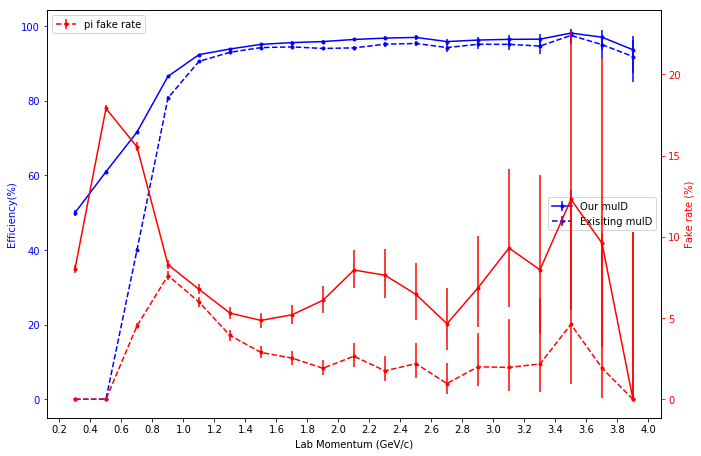

In [16]:
mom_plot = np.arange(0.3, 4.1, 0.2)

fig, ax1 = plt.subplots(figsize=(11, 7.5))
ax1.errorbar(mom_plot, single_new_eff, yerr=[single_new_eff-single_new_eff_ll, single_new_eff_ul-single_new_eff], fmt='b.-',label='Our muID')
ax1.set_xlabel('Lab Momentum (GeV/c)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Efficiency(%)' , color='b')
ax1.tick_params('y', colors='b')
ax1.errorbar(mom_plot, single_std_eff,yerr=[single_std_eff-single_std_eff_ll, single_std_eff_ul-single_std_eff], fmt='b--.',label='Exisiting muID')
ax1.set_xticks(np.arange(0.2, 4.1, 0.2))
ax1.legend(loc=5)

ax2 = ax1.twinx()
ax2.errorbar(mom_plot, single_new_fake_pi, yerr=[single_new_fake_pi-single_new_fake_pi_ll, single_new_fake_pi_ul-single_new_fake_pi], fmt='r.-')
ax2.errorbar(mom_plot, single_std_fake_pi, yerr=[single_std_fake_pi-single_std_fake_pi_ll, single_std_fake_pi_ul-single_std_fake_pi],fmt= 'r--.',label='pi fake rate')
ax2.set_ylabel('Fake rate (%)', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc=2)

fig.savefig("./../reports/18-11-28/overall-single.png")

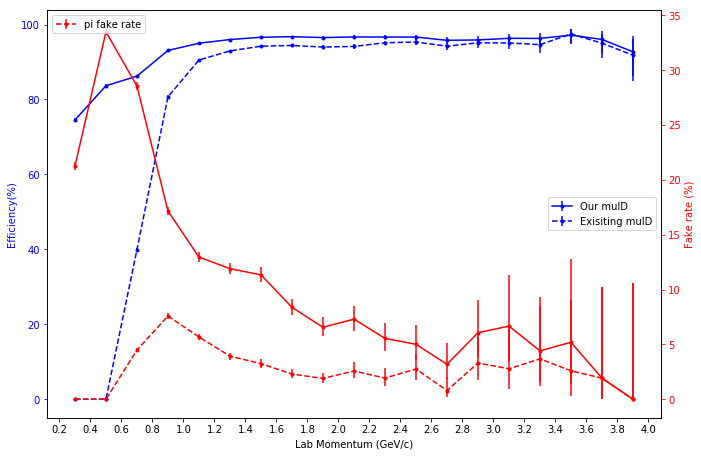

In [15]:
mom_plot = np.arange(0.3, 4.1, 0.2)

fig, ax1 = plt.subplots(figsize=(11, 7.5))
ax1.errorbar(mom_plot, all_new_eff, yerr=[all_new_eff-all_new_eff_ll, all_new_eff_ul-all_new_eff], fmt='b.-',label='Our muID')
ax1.set_xlabel('Lab Momentum (GeV/c)')
# Make the y-axis label, ticks and tick labels match the line color.
ax1.set_ylabel('Efficiency(%)' , color='b')
ax1.tick_params('y', colors='b')
ax1.errorbar(mom_plot, all_std_eff,yerr=[all_std_eff-all_std_eff_ll, all_std_eff_ul-all_std_eff], fmt='b--.',label='Exisiting muID')
ax1.set_xticks(np.arange(0.2, 4.1, 0.2))
ax1.legend(loc=5)

ax2 = ax1.twinx()
ax2.errorbar(mom_plot, all_new_fake_pi, yerr=[all_new_fake_pi-all_new_fake_pi_ll, all_new_fake_pi_ul-all_new_fake_pi], fmt='r.-')
ax2.errorbar(mom_plot, all_std_fake_pi, yerr=[all_std_fake_pi-all_std_fake_pi_ll, all_std_fake_pi_ul-all_std_fake_pi],fmt= 'r--.',label='pi fake rate')
ax2.set_ylabel('Fake rate (%)', color='r')
ax2.tick_params('y', colors='r')
ax2.legend(loc=2)

fig.savefig("./../reports/18-11-28/overall-all.png")

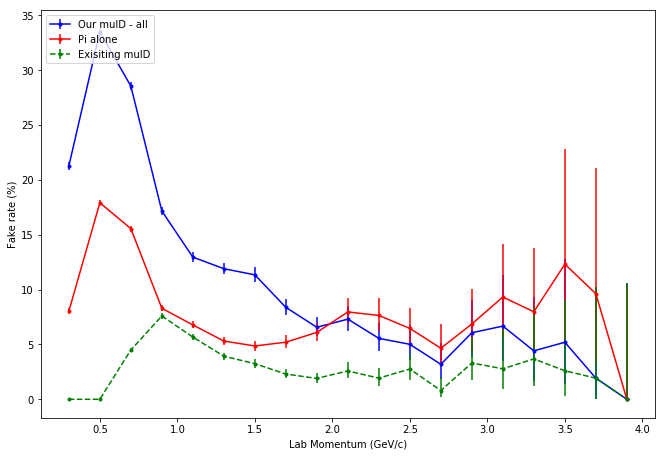

In [14]:
fig, ax1 = plt.subplots(figsize=(11, 7.5))

ax1.errorbar(mom_plot, all_new_fake_pi, yerr=[all_new_fake_pi-all_new_fake_pi_ll, all_new_fake_pi_ul-all_new_fake_pi], fmt='b.-',label='Our muID - all')
ax1.errorbar(mom_plot, single_new_fake_pi, yerr=[single_new_fake_pi-single_new_fake_pi_ll, single_new_fake_pi_ul-single_new_fake_pi], fmt='r.-',label='Pi alone')
ax1.set_xlabel('Lab Momentum (GeV/c)')
ax1.set_ylabel('Fake rate (%)')

ax1.errorbar(mom_plot, all_std_fake_pi, yerr=[all_std_fake_pi-all_std_fake_pi_ll, all_std_fake_pi_ul-all_std_fake_pi],fmt= 'g--.',label='Exisiting muID')

ax1.legend(loc=2)

fig.savefig("./../reports/18-11-28/fake_pi.png")